In [1]:
!pip install geopandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 8.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 10.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 10.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 9.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 10.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 1

  f_code  coc        nam            laa      pop   ypc adm_code salb  soc  \
0  FA001  JPN  Hokkai Do    Sapporo Shi  1930496  2014    01100  UNK  JPN   
1  FA001  JPN  Hokkai Do   Hakodate Shi   274485  2014    01202  UNK  JPN   
2  FA001  JPN  Hokkai Do      Otaru Shi   127224  2014    01203  UNK  JPN   
3  FA001  JPN  Hokkai Do  Asahikawa Shi   349057  2014    01204  UNK  JPN   
4  FA001  JPN  Hokkai Do    Muroran Shi    91276  2014    01205  UNK  JPN   

                                            geometry  
0  POLYGON ((141.44980 43.16333, 141.44769 43.157...  
1  POLYGON ((140.86501 42.01013, 140.86800 42.008...  
2  POLYGON ((141.24820 43.15973, 141.24680 43.158...  
3  POLYGON ((142.43280 43.94814, 142.43790 43.944...  
4  POLYGON ((140.99080 42.43800, 140.99680 42.436...  


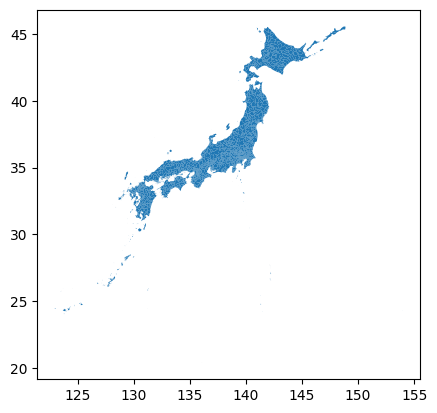

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# SHPファイルの読み込み
shp_path = 'gm-jpn-bnd_u_2_1/polbnda_jpn.shp'
gdf = gpd.read_file(shp_path)

# GeoDataFrameの内容を確認
print(gdf.head())

# プロット
gdf.plot()
plt.show()


In [68]:
# adm_code.txtを使ってadm_codeから行政区名を取得
adm_code_path = 'adm_code.txt'
adm_code = {}
pref_code = {}
with open(adm_code_path, 'r') as f:
    for line in f:
        line = line.strip().split('\t')
        code = line[0]
        # 最後の文字を削除（チェックデジットなので
        code = code[:-1]
        pcode = code[0:2]
        adm_code[code] = line[2]
        pref_code[pcode] = line[1]
pref_code

{'01': '北海道',
 '02': '青森県',
 '03': '岩手県',
 '04': '宮城県',
 '05': '秋田県',
 '06': '山形県',
 '07': '福島県',
 '08': '茨城県',
 '09': '栃木県',
 '10': '群馬県',
 '11': '埼玉県',
 '12': '千葉県',
 '13': '東京都',
 '14': '神奈川県',
 '15': '新潟県',
 '16': '富山県',
 '17': '石川県',
 '18': '福井県',
 '19': '山梨県',
 '20': '長野県',
 '21': '岐阜県',
 '22': '静岡県',
 '23': '愛知県',
 '24': '三重県',
 '25': '滋賀県',
 '26': '京都府',
 '27': '大阪府',
 '28': '兵庫県',
 '29': '奈良県',
 '30': '和歌山県',
 '31': '鳥取県',
 '32': '島根県',
 '33': '岡山県',
 '34': '広島県',
 '35': '山口県',
 '36': '徳島県',
 '37': '香川県',
 '38': '愛媛県',
 '39': '高知県',
 '40': '福岡県',
 '41': '佐賀県',
 '42': '長崎県',
 '43': '熊本県',
 '44': '大分県',
 '45': '宮崎県',
 '46': '鹿児島県',
 '47': '沖縄県'}

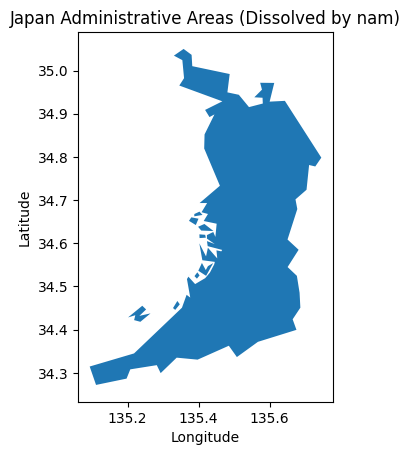

In [71]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# SHPファイルのパス
shp_path = 'gm-jpn-bnd_u_2_1/polbnda_jpn.shp'

# SHPファイルを読み込む
gdf = gpd.read_file(shp_path)


# 東京の処理

# namが"Tokyo To"の行を抽出する
tokyo_gdf = gdf[gdf['nam'] == 'Tokyo To']

# laa属性の末尾が"Shi"または"Ku"、"Hinode Machi"の行を抽出する
filtered_tokyo_gdf = tokyo_gdf[tokyo_gdf['laa'].str.endswith(('Shi','Ku','Hinode Machi'))]

# 元のGeoDataFrameからTokyo Toの行を削除する
gdf = gdf[gdf['nam'] != 'Tokyo To']

# Tokyo Toの行にフィルタリングされた結果を追加する
gdf = gpd.GeoDataFrame(pd.concat([gdf, filtered_tokyo_gdf]))

# 全てのnam属性を結合する
japan_gdf = gdf.dissolve()
japan_gdf['nam'] = 'Japan'
gdf = gpd.GeoDataFrame(pd.concat([gdf, japan_gdf]))
gdf_dissolved = gdf.dissolve(by='nam')
gdf_dissolved['geometry'] = gdf_dissolved['geometry'].simplify(tolerance=0.01, preserve_topology=True)

gdf_dissolved[gdf_dissolved.index == 'Osaka Fu'].plot()
plt.title('Japan Administrative Areas (Dissolved by nam)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [72]:
# 一つのGeoJSONファイルとして保存
output_geojson_path = 'pref.geojson'
# nam_jaの追加 adm_codeの上２桁を使って都道府県名を取得
gdf_dissolved['nam_ja'] = gdf_dissolved["adm_code"].str[0:2].map(pref_code)
gdf_dissolved["laa_ja"]=""
gdf_dissolved.to_file(output_geojson_path, driver='GeoJSON')
gdf_dissolved.head()

,geometry,f_code,coc,laa,pop,ypc,adm_code,salb,soc,nam_ja,laa_ja
nam,,,,,,,,,,,
Aichi Ken,"MULTIPOLYGON (((136.96809 34.72360, 136.97200 ...",FA001,JPN,Nagoya Shi,2254891,2014,23100,UNK,JPN,愛知県,
Akita Ken,"MULTIPOLYGON (((139.52360 39.17861, 139.52027 ...",FA001,JPN,Akita Shi,320720,2014,05201,UNK,JPN,秋田県,
Aomori Ken,"MULTIPOLYGON (((140.34250 40.45127, 140.30991 ...",FA001,JPN,Aomori Shi,298416,2014,02201,UNK,JPN,青森県,
Chiba Ken,"MULTIPOLYGON (((139.82690 34.92533, 139.75290 ...",FA001,JPN,Chiba Shi,960051,2014,12100,UNK,JPN,千葉県,
Ehime Ken,"MULTIPOLYGON (((132.43150 32.92993, 132.43150 ...",FA001,JPN,Matsuyama Shi,-89999999,2014,38201,UNK,JPN,愛媛県,


In [73]:
import os
# laa属性で領域を結合
# SHPファイルのパス
shp_path = 'gm-jpn-bnd_u_2_1/polbnda_jpn.shp'

# SHPファイルを読み込む
gdf = gpd.read_file(shp_path)

gdf_dissolved = gdf.dissolve(by='laa')
gdf_dissolved.head()

,geometry,f_code,coc,nam,pop,ypc,adm_code,salb,soc
laa,,,,,,,,,
Abashiri Shi,"POLYGON ((144.36391 43.95667, 144.36140 43.955...",FA001,JPN,Hokkai Do,38240,2014,01211,UNK,JPN
Abiko Shi,"POLYGON ((140.03059 35.90093, 140.04860 35.891...",FA001,JPN,Chiba Ken,133665,2014,12222,UNK,JPN
Abira Cho,"POLYGON ((141.87050 42.92280, 141.87180 42.922...",FA001,JPN,Hokkai Do,8684,2014,01585,UNK,JPN
Abu Cho,"MULTIPOLYGON (((131.56270 34.60713, 131.57980 ...",FA001,JPN,Yamaguchi Ken,3712,2014,35502,UNK,JPN
Achi Mura,"POLYGON ((137.69400 35.55407, 137.70300 35.553...",FA001,JPN,Nagano Ken,6864,2014,20407,UNK,JPN


In [74]:

# 複数のGeoJSONファイルとして保存
output_dir = "town"

# 各都道府県をGeoJSON形式で保存
for name, group in gdf_dissolved.groupby('nam'):
    # 最初の行のadm_codeの上２桁をファイル名にする
    safe_name = group['adm_code'].iloc[0][0:2]
    output_geojson_path = os.path.join(output_dir, f'{safe_name}.geojson')
    group['geometry'] = group['geometry'].simplify(tolerance=0.1, preserve_topology=True)
    group["laa_ja"]=group["adm_code"].map(adm_code)
    group["nam_ja"] = group["adm_code"].str[0:2].map(pref_code)
    group.to_file(output_geojson_path, driver='GeoJSON')

    print(f'Saved {output_geojson_path}')

Saved town/aichi.geojson
Saved town/akita.geojson
Saved town/aomori.geojson
Saved town/chiba.geojson
Saved town/ehime.geojson
Saved town/fukui.geojson
Saved town/fukuoka.geojson
Saved town/fukushima.geojson
Saved town/gifu.geojson
Saved town/gunma.geojson
Saved town/hiroshima.geojson
Saved town/hokkai.geojson
Saved town/hyogo.geojson
Saved town/ibaraki.geojson
Saved town/ishikawa.geojson
Saved town/iwate.geojson
Saved town/kagawa.geojson
Saved town/kagoshima.geojson
Saved town/kanagawa.geojson
Saved town/kochi.geojson
Saved town/kumamoto.geojson
Saved town/kyoto.geojson
Saved town/mie.geojson
Saved town/miyagi.geojson
Saved town/miyazaki.geojson
Saved town/nagano.geojson
Saved town/nagasaki.geojson
Saved town/nara.geojson
Saved town/niigata.geojson
Saved town/oita.geojson
Saved town/okayama.geojson
Saved town/okinawa.geojson
Saved town/osaka.geojson
Saved town/saga.geojson
Saved town/saitama.geojson
Saved town/shiga.geojson
Saved town/shimane.geojson
Saved town/shizuoka.geojson
Saved t

In [5]:
!cp pref.geojson ../public/data/
!cp -r town ../public/data/